In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ADBE.csv')

Взято из датасета https://www.kaggle.com/dgawlik/nyse, взял ADBE тикер, так как у него хорошая корреляция

<AxesSubplot:>

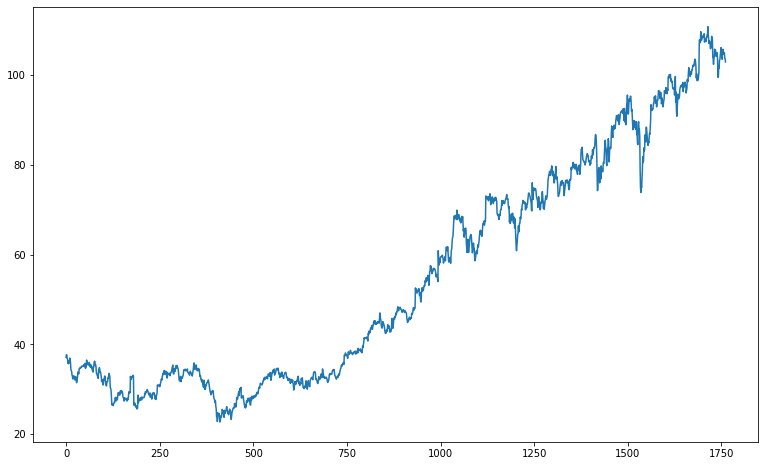

In [3]:
df['close'].plot(figsize=(13,8))

In [4]:
x = pd.Series(df.index)

In [5]:
cov = 0
sigma_x = 0
sigma_y = 0
for i in range(len(df)):
    cov += (x.loc[i] - x.mean()) * (df.loc[i] - df.mean())
    sigma_x += (x.loc[i] - x.mean()) ** 2
    sigma_y += (df.loc[i] - df.mean()) ** 2
coef = float(cov / np.sqrt(sigma_x * sigma_y))
print('Коэффициент корреляции Пирсона =',coef)

Коэффициент корреляции Пирсона = 0.9415117579699546


In [6]:
df['x'] = pd.Series(df.index)
df.corr().loc['close']['x']

0.941511757969954

Можно и через numpy/pandas проверить.
Как можно заметить, коэффициент очень хороший, рекомендую инвестировать

Возьмем оценки по a_0 и a_1 из нмк и построим прямую, которую сравним с графиком

In [7]:
sum_x = np.sum(x.values)
sum_y = np.sum(df['close'].values)

In [8]:
sum_xy = 0
for xi,yi in zip(x.values,df['close'].values):
    sum_xy += xi*yi

sum_x_square = 0
for xi in x.values:
    sum_x_square += xi ** 2

In [9]:
sum_x,sum_y,sum_xy,sum_x_square

(1551441, 97346.81998, 107244496.42065294, 1821908881)

In [10]:
a_1 = float((len(df) * sum_xy - sum_x * sum_y)/(len(df) * sum_x_square - (sum_x) ** 2))

In [11]:
a_1

0.0472302493637982

In [12]:
a_0 = (sum_y - a_1 * sum_x) / len(df)
a_0

13.66167688807012

In [13]:
y = a_1 * df['x'].values + a_0

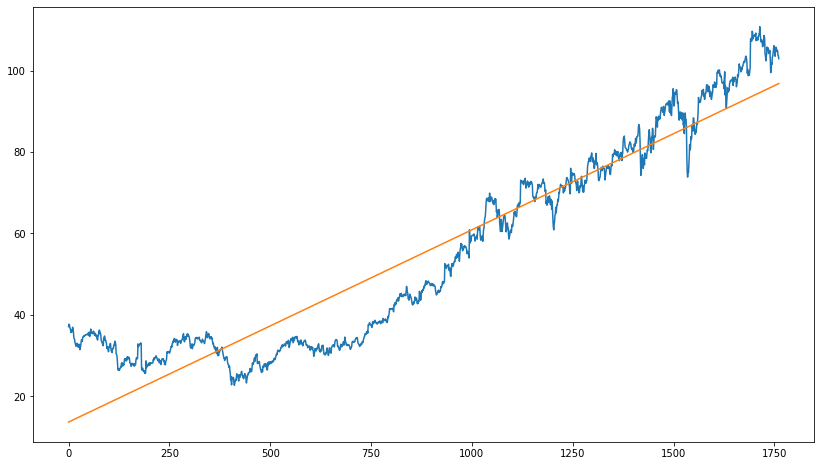

In [14]:
df['close'].plot(figsize = (14,8))
plt.plot(df['x'],y)
plt.show()

In [15]:
import statsmodels.api as sm

model = sm.OLS(df['close'].values,df['x'].values).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          5.230e+04
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                        02:13:33   Log-Likelihood:                         -6722.6
No. Observations:                1762   AIC:                                  1.345e+04
Df Residuals:                    1761   BIC:                                  1.345e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0589      0.000    228.696      0.000       0.058       0.059
==============================================================================
Omnibus:                      349.463   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.219
Skew:                           1.308   Prob(JB):                    1.86e-128
Kurtosis:                       4.083   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Тут, что интересно, нету даже константы, а коэф отличается от нашего на 24%, но просто числа очень маленькие

In [16]:
0.0589/0.0472302493637982

1.247082130486201

In [17]:
y = 0.0589 * df['x'].values 

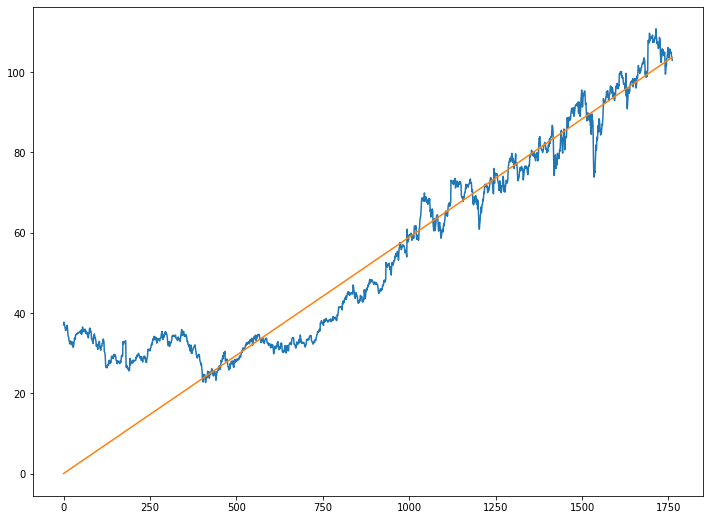

In [18]:
df['close'].plot(figsize = (12,9))
plt.plot(df['x'],y)
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(df['x'].values.reshape(-1,1),df['close'].values.reshape(-1,1))
regression.coef_[0][0]

0.04723024936379829

In [20]:
regression.intercept_[0]

13.66167688807004

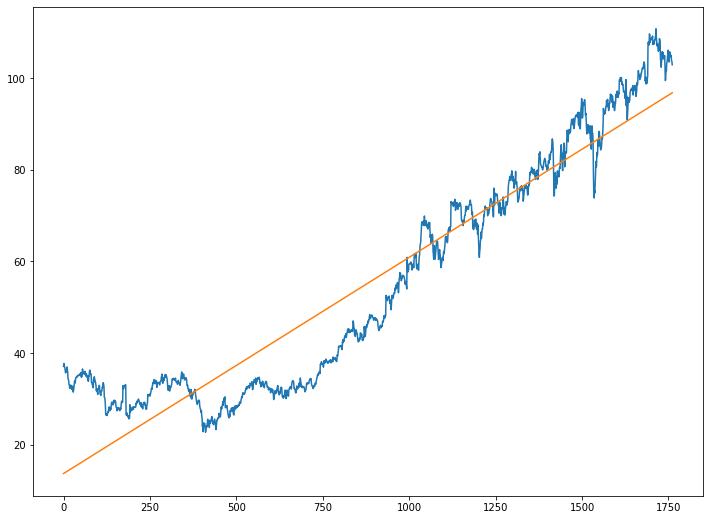

In [21]:
y = regression.coef_[0][0] * df['x'].values + regression.intercept_[0]
df['close'].plot(figsize = (12,9))
plt.plot(df['x'],y)
plt.show()

Абсолютно те же самые числа, что мы получили ручками

Проблемы в подсчете руками появляются тогда, когда больше, чем одна колонка и регрессия состоит уже из нескольких коэффициентов, связанных между собой.

In [22]:
df = pd.read_csv('beer.csv')
df = df.dropna()

In [23]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [24]:
df.drop('Data',axis=1,inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    object 
 1   Temperatura Minima (C)       365 non-null    object 
 2   Temperatura Maxima (C)       365 non-null    object 
 3   Precipitacao (mm)            365 non-null    object 
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(4)
memory usage: 20.0+ KB


In [26]:
df.columns = ['t_mean','t_min','t_max','mm','final','consum']

In [27]:
df.replace(',','.',inplace=True,regex=True)

In [28]:
df = df.apply(pd.to_numeric)
df

,t_mean,t_min,t_max,mm,final,consum
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0,32.307
361,22.64,21.1,26.7,0.0,0.0,26.095
362,21.68,20.3,24.1,10.3,0.0,22.309
363,21.38,19.3,22.4,6.3,0.0,20.467


<AxesSubplot:>

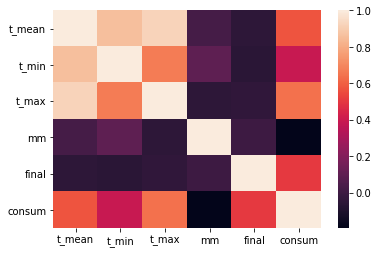

In [29]:
import seaborn as sns
sns.heatmap(df.corr())

In [30]:
df.corr()

,t_mean,t_min,t_max,mm,final,consum
t_mean,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
t_min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
t_max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
mm,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
final,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consum,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


<AxesSubplot:>

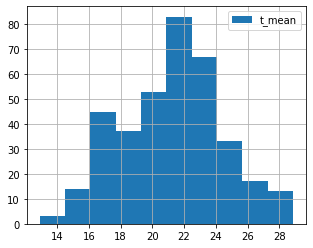

In [31]:
df['t_mean'].hist(figsize = (5,4), legend = 't_mean')

<AxesSubplot:>

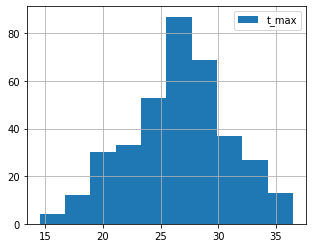

In [32]:
df['t_max'].hist(figsize = (5,4), legend = 't_max')

<AxesSubplot:>

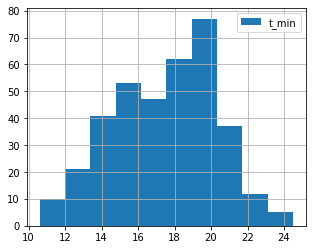

In [33]:
df['t_min'].hist(figsize = (5,4), legend = 't_min')

<AxesSubplot:>

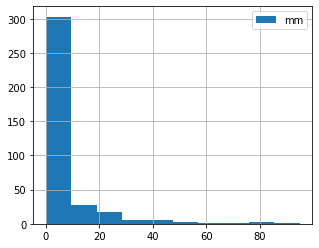

In [34]:
df['mm'].hist(figsize = (5,4), legend = 'mm')

<AxesSubplot:>

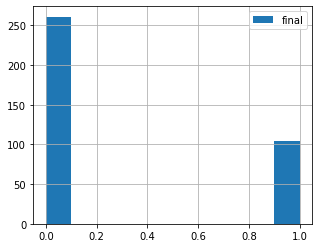

In [35]:
df['final'].hist(figsize = (5,4), legend = 'final')

<AxesSubplot:>

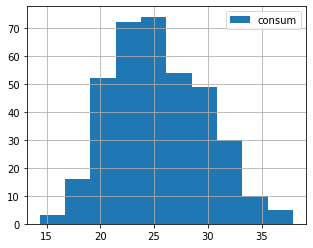

In [36]:
df['consum'].hist(figsize = (5,4), legend = 'consum')

Корреляции с предсказываемой величиной (consum) меньше чем 0,65, как можно заметить, у "mm" корреляция вообще отрицательная, пусть и ближе к 0. Посмотрим что покажет наша модель из statsmodels

In [37]:
model = sm.OLS(df['consum'],df.drop('consum',axis=1)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 consum   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              7620.
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                        02:13:36   Log-Likelihood:                         -851.48
No. Observations:                 365   AIC:                                      1713.
Df Residuals:                     360   BIC:                                      1732.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
t_mean         0.1192      0.202      0.590      0.555      -0.278       0.516
t_min          0.1146      0.117      0.977      0.329      -0.116       0.345
t_max          0.7313      0.102      7.179      0.000       0.531       0.932
mm            -0.0552      0.011     -5.112      0.000      -0.076      -0.034
final          5.4816      0.289     18.989      0.000       4.914       6.049
==============================================================================
Omnibus:                       20.752   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.729
Skew:                          -0.175   Prob(JB):                      0.00771
Kurtosis:                       2.281   Cond. No.                         85.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как можно заметить, исходя из того, что значения t очень скореллированы, то коэффициенты у t_mean и t_min примерно одинаковые. Попробуем убрать одну из строчек и посмотрим, как это повлияет на коэффициенты

In [38]:
model = sm.OLS(df['consum'],df.drop(['consum','t_mean'],axis=1)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 consum   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              9543.
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                        02:13:37   Log-Likelihood:                         -851.66
No. Observations:                 365   AIC:                                      1711.
Df Residuals:                     361   BIC:                                      1727.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
t_min          0.1744      0.059      2.962      0.003       0.059       0.290
t_max          0.7870      0.038     20.531      0.000       0.712       0.862
mm            -0.0548      0.011     -5.090      0.000      -0.076      -0.034
final          5.4836      0.288     19.014      0.000       4.916       6.051
==============================================================================
Omnibus:                       20.627   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.700
Skew:                          -0.175   Prob(JB):                      0.00783
Kurtosis:                       2.282   Cond. No.                         71.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как можно заметить, вес остальные коэффициенты немного прибавили.

In [39]:
model = sm.OLS(df['consum'],df.drop(['consum','t_mean','t_min'],axis=1)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 consum   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.245e+04
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                        02:13:37   Log-Likelihood:                         -856.04
No. Observations:                 365   AIC:                                      1718.
Df Residuals:                     362   BIC:                                      1730.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
t_max          0.8991      0.006    147.698      0.000       0.887       0.911
mm            -0.0482      0.011     -4.525      0.000      -0.069      -0.027
final          5.4950      0.291     18.854      0.000       4.922       6.068
==============================================================================
Omnibus:                       17.939   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.568
Skew:                          -0.208   Prob(JB):                      0.00836
Kurtosis:                       2.325   Cond. No.                         60.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Если же убрать два скореллированных столбца и оставить один, то при сравнении, можно увидеть, что он вобрал в себя два других, ведь mm и final не сильно изменились

In [40]:
model = LinearRegression()
model.fit(df['consum'].values.reshape(-1, 1),df.drop('consum',axis=1))

model.coef_

array([[ 0.41538471],
       [ 0.2521633 ],
       [ 0.63072566],
       [-0.54701186],
       [ 0.05198829]])

In [41]:
model.intercept_

array([10.67501674, 11.05607726, 10.59021293, 19.09156141, -1.03564217])

Запомним эти коэффициенты

In [42]:
from sklearn.linear_model import Lasso

In [43]:
model = Lasso()
model.fit(df['consum'].values.reshape(-1, 1),df.drop('consum',axis=1))

model.coef_

array([[ 3.63569721e-01],
       [ 2.00348316e-01],
       [ 5.78910670e-01],
       [-4.95196875e-01],
       [ 1.73306104e-04]])

In [44]:
model.intercept_

array([11.9911882 , 12.37224873, 11.9063844 , 17.77538994,  0.28052929])

Что такое Lasso? Это линейная регрессия, но у которой немного измененная оптимизационная задача. Если у обычной линейной регрессии мы ищем минимум в (y-xk-b)^2, то тут к ней добавляется еще alpha*|w|. Что такое alpha и w? W=weights, это вектор коэффициентов, которые получает модель. alpha - гиперпараметр, то есть то, что устанавливает человек заранее и что влияет на работу алгоритма. К примеру: сейчас в моделе автоматически стоит параметр alpha=1.0, что будет если поставить alpha = 1.5? То теперь наша оптимизационная задача по поиску минимума будет выглядеть так (y-kx-b)^2+1.5*|w|, а значит алгоритм будет сильнее штрафовать за веса, ведь у весов теперь больше "вес". А значит они должны быть меньше

In [45]:
model = Lasso(alpha=1.5)
model.fit(df['consum'].values.reshape(-1, 1),df.drop('consum',axis=1))

model.coef_

array([[ 0.33766223],
       [ 0.17444082],
       [ 0.55300318],
       [-0.46928938],
       [ 0.        ]])

In [46]:
model.intercept_

array([12.64927394, 13.03033447, 12.56447013, 17.11730421,  0.28493151])

Как можно заметить, intercept, или же b в формуле y=kx+b стала больше в среднем, в то же время как веса или коэффициенты уменьшились.

In [47]:
from sklearn.linear_model import Ridge

In [48]:
model = Ridge()
model.fit(df['consum'].values.reshape(-1, 1),df.drop('consum',axis=1))

model.coef_

array([[ 0.41532575],
       [ 0.25212751],
       [ 0.63063613],
       [-0.54693422],
       [ 0.05198091]])

In [49]:
model.intercept_

array([10.67651438, 11.05698642, 10.59248697, 19.08958919, -1.03545473])

Ridge - это линейная регрессия с регуляризацией, так же как и LASSO, но тут уже стоит не сумма весов на коэффициент, а сумма квадратов весов на коэф. Если у обычной линейной регрессии мы ищем минимум в (y-xk-b)^2, то тут к ней добавляется еще alpha*|w^2|.

In [50]:
model = Ridge(alpha = 1.5)
model.fit(df['consum'].values.reshape(-1, 1),df.drop('consum',axis=1))

model.coef_

array([[ 0.41529627],
       [ 0.25210962],
       [ 0.63059138],
       [-0.54689541],
       [ 0.05197722]])

In [51]:
model.intercept_

array([10.67726304, 11.05744091, 10.59362375, 19.08860329, -1.03536103])

In [52]:
from sklearn.linear_model import ElasticNet

In [53]:
model = Ridge()
model.fit(df['consum'].values.reshape(-1, 1),df.drop('consum',axis=1))

model.coef_

array([[ 0.41532575],
       [ 0.25212751],
       [ 0.63063613],
       [-0.54693422],
       [ 0.05198091]])

In [54]:
model.intercept_

array([10.67651438, 11.05698642, 10.59248697, 19.08958919, -1.03545473])